In [44]:
#Повнозв'язані нейронні мережі
#Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого 
#поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

In [45]:
import pandas as pd

df = pd.read_csv("ParisHousingClass99.88.csv")

In [46]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [47]:
df['target'] =(df['category']== 'Luxury').astype("int")

In [48]:
X = df.drop(['category','target'], axis=1)
y = df['target'].values

In [49]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,stratify=y)

In [51]:
y_train[10]

1

In [52]:
#Build a binary classification model

from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               4608      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss='binary_crossentropy',   optimizer='sgd', metrics=['accuracy'])

In [54]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=64,                                   
                    validation_split=0.3,
                    verbose = 2)

Epoch 1/20
66/66 - 2s - loss: 0.6374 - accuracy: 0.6912 - val_loss: 0.5904 - val_accuracy: 0.7456 - 2s/epoch - 37ms/step
Epoch 2/20
66/66 - 0s - loss: 0.5697 - accuracy: 0.7476 - val_loss: 0.5531 - val_accuracy: 0.7456 - 450ms/epoch - 7ms/step
Epoch 3/20
66/66 - 1s - loss: 0.5339 - accuracy: 0.7476 - val_loss: 0.5228 - val_accuracy: 0.7456 - 511ms/epoch - 8ms/step
Epoch 4/20
66/66 - 0s - loss: 0.5043 - accuracy: 0.7479 - val_loss: 0.4939 - val_accuracy: 0.7456 - 490ms/epoch - 7ms/step
Epoch 5/20
66/66 - 0s - loss: 0.4743 - accuracy: 0.7502 - val_loss: 0.4659 - val_accuracy: 0.7461 - 451ms/epoch - 7ms/step
Epoch 6/20
66/66 - 0s - loss: 0.4470 - accuracy: 0.7557 - val_loss: 0.4385 - val_accuracy: 0.7544 - 343ms/epoch - 5ms/step
Epoch 7/20
66/66 - 0s - loss: 0.4201 - accuracy: 0.7802 - val_loss: 0.4116 - val_accuracy: 0.7778 - 494ms/epoch - 7ms/step
Epoch 8/20
66/66 - 1s - loss: 0.3936 - accuracy: 0.8145 - val_loss: 0.3854 - val_accuracy: 0.8206 - 589ms/epoch - 9ms/step
Epoch 9/20
66/66 -

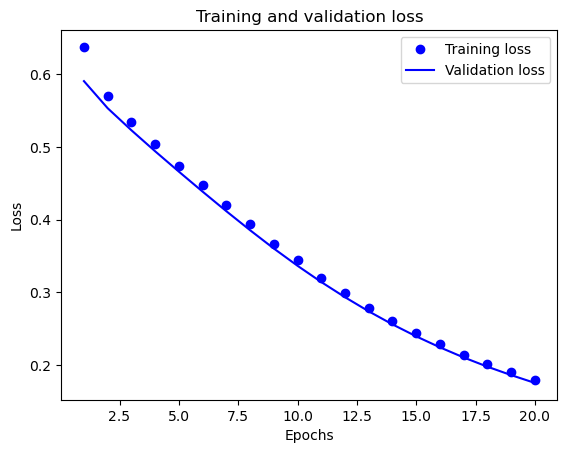

In [55]:
import matplotlib
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])#У лр1 результати accuracy теж були близькы до 1

Test loss: 0.16922183334827423
Test accuracy: 0.9937499761581421


In [57]:
# 2. Згорткові нейронні мережі
# Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі 
#(якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

In [59]:
import glob

print(glob.glob("data\\*"))

['data\\cloudy', 'data\\desert', 'data\\green_area', 'data\\water']


In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(rescale = 1.0/255.).flow_from_directory("data",target_size=(32, 32),shuffle=0) 

Found 5631 images belonging to 4 classes.


In [61]:
target=['cloudy', 'desert', 'green_area', 'water']

In [62]:
import numpy as np
X=np.concatenate([data.next()[0] for i in range(data.__len__())]) 
y=np.concatenate([data.next()[1] for i in range(data.__len__())])

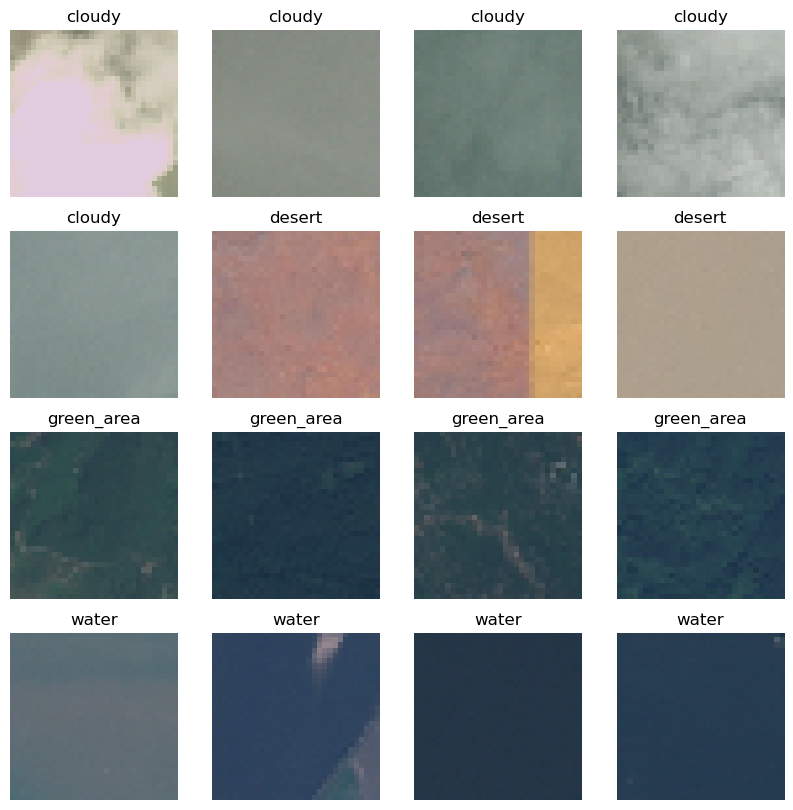

In [63]:
#show images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i*350])
    plt.title(target[int(*np.where(y[i*350]!=0))])
    plt.axis('off')


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3)

In [65]:
X[0].shape

(32, 32, 3)

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model =  keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X[0].shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

In [67]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1605760   
                                                      

In [68]:
y_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [72]:
model.fit(X_train, y_train,
          batch_size=16,
          epochs=30,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/30
247/247 - 11s - loss: 0.1126 - accuracy: 0.9589 - val_loss: 0.1021 - val_accuracy: 0.9686 - 11s/epoch - 46ms/step
Epoch 2/30
247/247 - 10s - loss: 0.1019 - accuracy: 0.9642 - val_loss: 0.0969 - val_accuracy: 0.9657 - 10s/epoch - 42ms/step
Epoch 3/30
247/247 - 12s - loss: 0.1020 - accuracy: 0.9635 - val_loss: 0.0966 - val_accuracy: 0.9686 - 12s/epoch - 47ms/step
Epoch 4/30
247/247 - 11s - loss: 0.1564 - accuracy: 0.9513 - val_loss: 0.1053 - val_accuracy: 0.9675 - 11s/epoch - 46ms/step
Epoch 5/30
247/247 - 11s - loss: 0.1032 - accuracy: 0.9635 - val_loss: 0.0934 - val_accuracy: 0.9645 - 11s/epoch - 45ms/step
Epoch 6/30
247/247 - 11s - loss: 0.1305 - accuracy: 0.9482 - val_loss: 0.1368 - val_accuracy: 0.9402 - 11s/epoch - 45ms/step
Epoch 7/30
247/247 - 11s - loss: 0.0976 - accuracy: 0.9657 - val_loss: 0.1358 - val_accuracy: 0.9574 - 11s/epoch - 44ms/step
Epoch 8/30
247/247 - 11s - loss: 0.1144 - accuracy: 0.9602 - val_loss: 0.3470 - val_accuracy: 0.8538 - 11s/epoch - 43ms/step


In [73]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10945456475019455
Test accuracy: 0.9644970297813416


In [74]:
# 3. Рекурентні нейронні мережі
# Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. 
# Результати порівняйте з одержаними раніш. 

In [75]:
data = pd.read_csv(r"mail_data.csv")

In [76]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | D

[nltk_data]    |   Package lin_thesaurus is already up-to-date!
[nltk_data]    | Downloading package mac_morpho to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package mac_morpho is already up-to-date!
[nltk_data]    | Downloading package machado to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package machado is already up-to-date!
[nltk_data]    | Downloading package masc_tagged to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package masc_tagged is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     C:\Users\А

[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package spanish_grammars to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package spanish_grammars is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     C:\Users\Администрато

True

In [77]:
lemmatizer = WordNetLemmatizer()

def Preprocess(text):
    
    clear_text = []
    for i in range(len(text)):

        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if (word not in stopwords.words('english') and len(word)>2)]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        clear_text.append(r)
    return clear_text
    

data['clear message']=Preprocess(list(data['Message'].values))
data.head(10)


,Category,Message,clear message
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile month entitled update latest colour mob...


In [78]:
# Додамо поле "Спам" з бінарними мітками (1: спам, 0: не спам)
data['Spam_label'] = data['Category'].map({'spam': 0, 'ham': 1})

# Запишемо вхідні дані (X) і мітку класу (Y) в окремі змінні
X = data["clear message"]
y = data["Spam_label"]

In [79]:
from sklearn.model_selection import train_test_split

# Ділимо дані на навчання і тест (70% на 30% відповідно)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 10000
tokenizer = Tokenizer(num_words=max_features)#create a vocabulary
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_seq_len = 80 # cut texts after this number of words
X_train = keras.preprocessing.sequence.pad_sequences (X_train, maxlen=max_seq_len)
X_test = keras.preprocessing.sequence.pad_sequences (X_test, maxlen=max_seq_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (3343, 80)
X_test shape: (2229, 80)


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense,LSTM

emb_dim = 128
model = keras.Sequential()
model.add(layers.Embedding(max_features, emb_dim))
model.add(layers.LSTM(128))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/5
21/21 - 14s - loss: 0.4268 - accuracy: 0.8411 - val_loss: 0.2807 - val_accuracy: 0.8580 - 14s/epoch - 678ms/step
Epoch 2/5
21/21 - 5s - loss: 0.1741 - accuracy: 0.9368 - val_loss: 0.1153 - val_accuracy: 0.9716 - 5s/epoch - 232ms/step
Epoch 3/5
21/21 - 5s - loss: 0.0608 - accuracy: 0.9862 - val_loss: 0.0608 - val_accuracy: 0.9821 - 5s/epoch - 234ms/step
Epoch 4/5
21/21 - 5s - loss: 0.0296 - accuracy: 0.9936 - val_loss: 0.0548 - val_accuracy: 0.9821 - 5s/epoch - 235ms/step
Epoch 5/5
21/21 - 5s - loss: 0.0192 - accuracy: 0.9955 - val_loss: 0.0460 - val_accuracy: 0.9836 - 5s/epoch - 220ms/step


In [85]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [86]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])#при використанні RandomForestClassifier точність теж була 0.98

Test loss: 0.07038341462612152
Test accuracy: 0.9807088375091553
